In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load datasets

Attributes:
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: the predicted attribute: heart disease presence (values 1,2,3,4) and absence (value 0).  

In [2]:
cleveland = pd.read_csv('processed.cleveland.data', 
            names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                  'ca', 'thal', 'num'])

In [3]:
# hungarian = pd.read_csv('processed.hungarian.data', 
#             names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
#                   'ca', 'thal', 'num'])

In [4]:
# switzerland = pd.read_csv('processed.switzerland.data', 
#             names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
#                   'ca', 'thal', 'num'])

In [5]:
# va = pd.read_csv('processed.va.data', 
#             names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
#                   'ca', 'thal', 'num'])

In [6]:
# data = pd.concat([cleveland, hungarian, switzerland, va])
data = cleveland

In [7]:
data.shape

(303, 14)

In [8]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### Preprocess

In [9]:
from scipy import stats

In [10]:
data.trestbps = data.trestbps.map(lambda x: x if x!="?" else np.nan)
data.trestbps = data.trestbps.astype('float64')
data.trestbps.fillna(data.trestbps.mean(), inplace=True)

In [11]:
data.chol = data.chol.map(lambda x: x if x!="?" else np.nan)
data.chol = data.chol.astype('float64')
data.chol.fillna(data.chol.mean(), inplace=True)

In [12]:
data.fbs = data.fbs.map(lambda x: x if x!="?" else np.nan)
data.fbs = data.fbs.astype('float64')
data.fbs.fillna(data.fbs.mode().values[0], inplace=True)

In [13]:
data.restecg = data.restecg.map(lambda x: x if x!="?" else np.nan)
data.restecg = data.restecg.astype('float64') 
data.restecg.fillna(data.restecg.mode().values[0], inplace=True)

In [14]:
data.thalach = data.thalach.map(lambda x: x if x!="?" else np.nan)
data.thalach = data.thalach.astype('float64')
data.thalach.fillna(data.thalach.median(), inplace=True)

In [15]:
data.exang = data.exang.map(lambda x: x if x!="?" else np.nan)
data.exang = data.exang.astype('float64')
data.exang.fillna(data.exang.mode().values[0], inplace=True)

In [16]:
data.oldpeak = data.oldpeak.map(lambda x: x if x!="?" else np.nan)
data.oldpeak = data.oldpeak.astype('float64')
data.oldpeak.fillna(data.oldpeak.mode().values[0], inplace=True)


In [17]:
data.slope = data.slope.map(lambda x: x if x!="?" else np.nan)
data.slope = data.slope.astype('float64')
data.slope.fillna(data.slope.mode().values[0], inplace=True)

In [18]:
data.ca = data.ca.map(lambda x: x if x!="?" else np.nan)
data.ca = data.ca.astype('float64')
data.ca.fillna(data.ca.mode().values[0], inplace=True)

In [19]:
data.thal = data.thal.map(lambda x: x if x!="?" else np.nan)
data.thal = data.thal.astype('float64')
data.thal.fillna(data.thal.mode().values[0], inplace=True)

In [20]:
data.age = data.age.astype('int32')
data.sex = data.sex.astype('int32') 
data.cp = data.cp.astype('int32')
data.restecg = data.restecg.astype('int32') 
data.thalach = data.thalach.astype('int32') 
data.exang = data.exang.astype('int32')
data.fps = data.fbs.astype('int32')
data.slope = data.slope.astype('int32')
data.ca = data.ca.astype('int32')
data.thal = data.thal.astype('int32')
data.num = data.num.astype('int32') 

C:\Users\Tuyen\AppData\Local\Temp\ipykernel_10868\1666714064.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.fps = data.fbs.astype('int32')


In [21]:
data['presence'] = data['num']!=0
data.presence = data.presence.astype('int32')
data = data.drop('num', axis=1)

### Study data

In [22]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


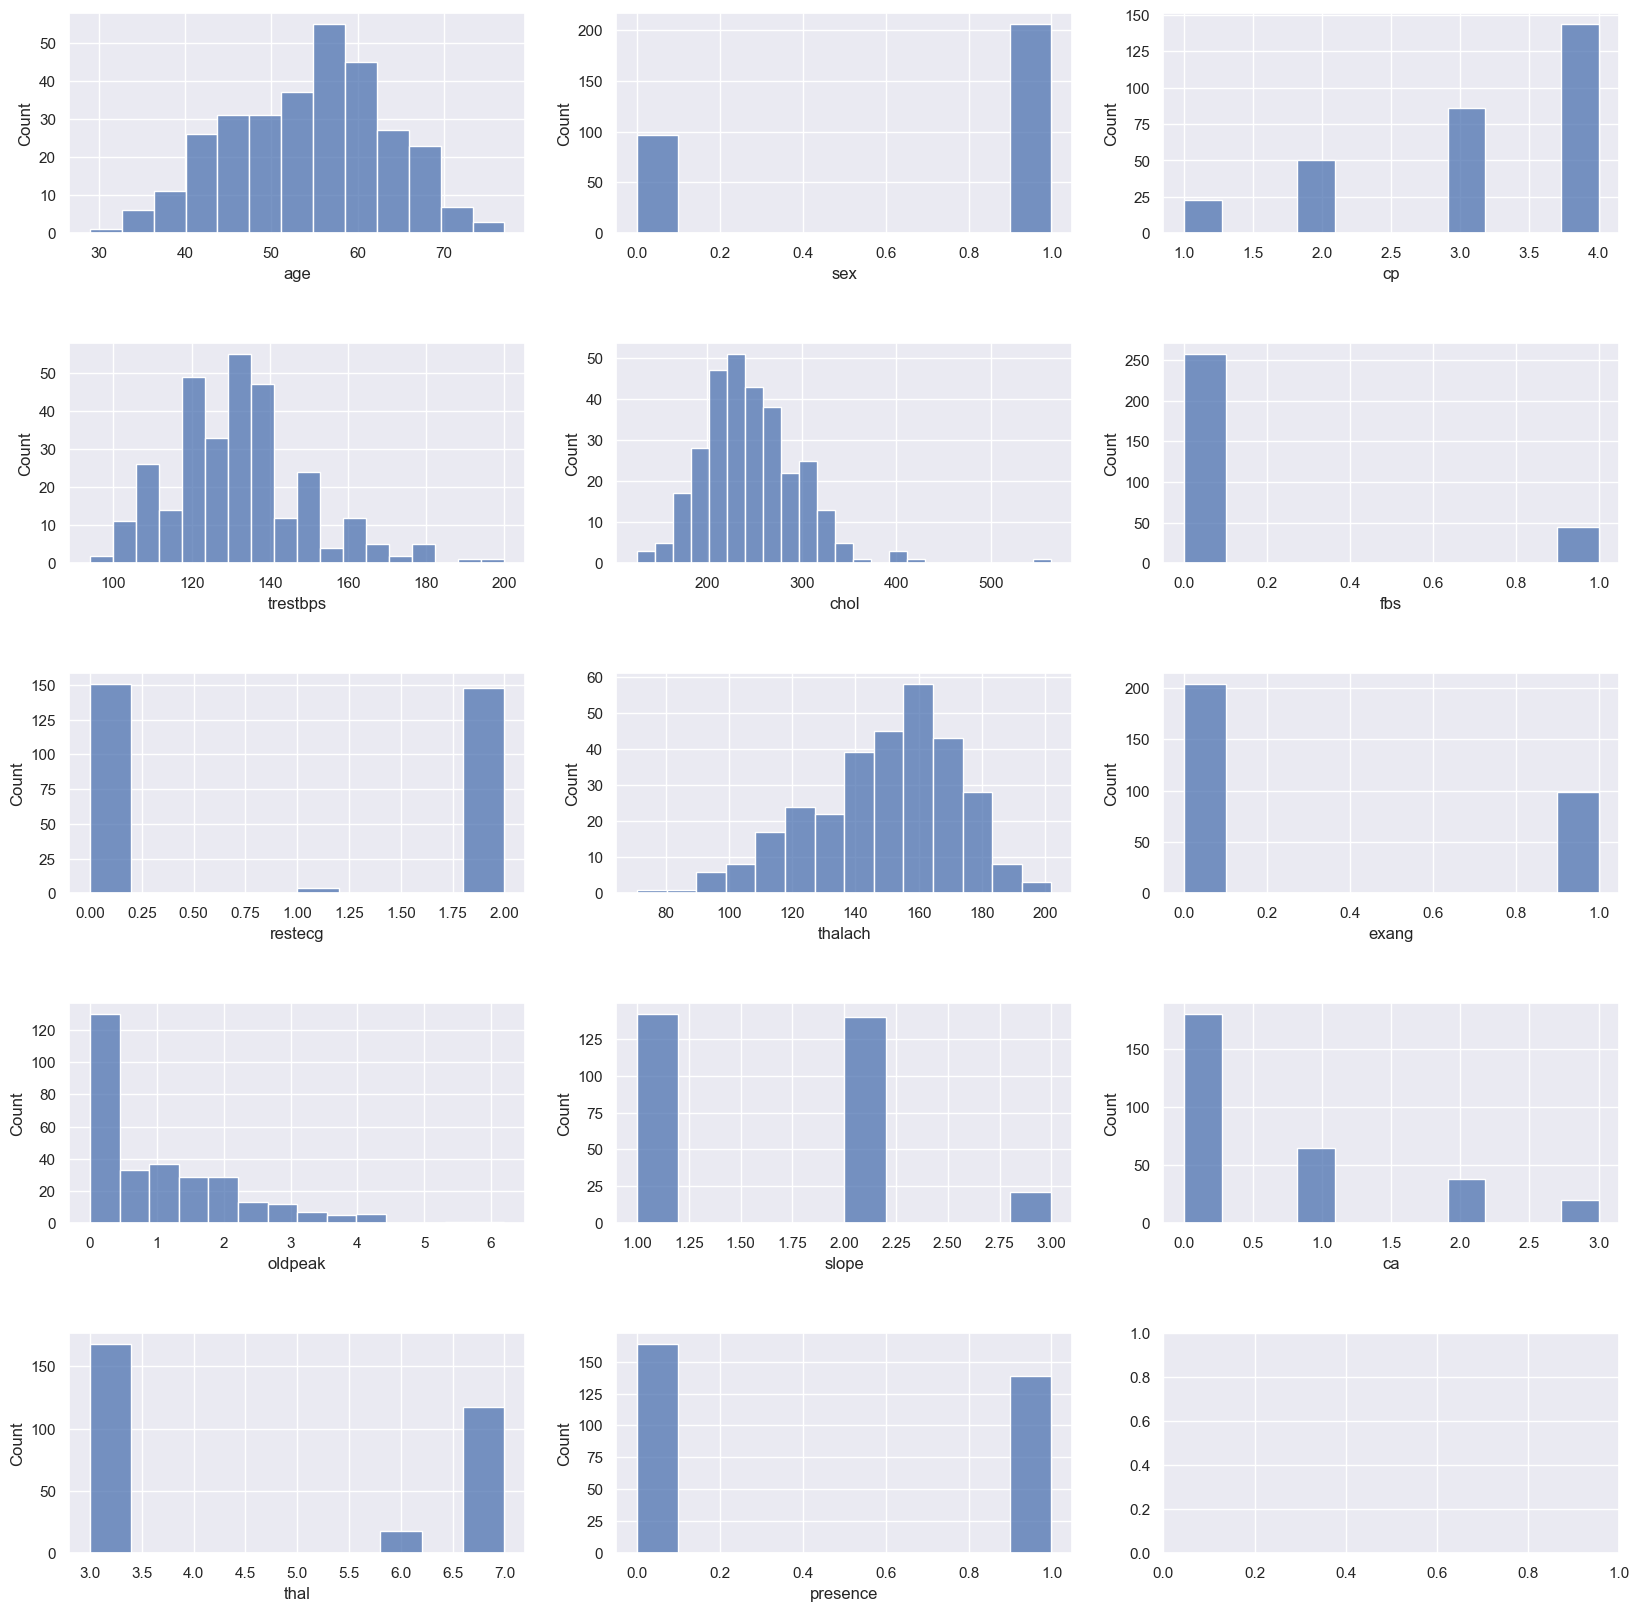

In [23]:
sns.set(rc={'figure.figsize':(20,20)})
fig, ax = plt.subplots(nrows=5, ncols=3, gridspec_kw= {'hspace':0.5})

sns.histplot(data.age, ax=ax[0,0])
sns.histplot(data.sex, ax=ax[0,1])
sns.histplot(data.cp, ax=ax[0,2])
sns.histplot(data.trestbps, ax=ax[1,0])
sns.histplot(data.chol, ax=ax[1,1])
sns.histplot(data.fbs, ax=ax[1,2])
sns.histplot(data.restecg, ax=ax[2,0])
sns.histplot(data.thalach, ax=ax[2,1])
sns.histplot(data.exang, ax=ax[2,2])
sns.histplot(data.oldpeak, ax=ax[3,0])
sns.histplot(data.slope, ax=ax[3,1])
sns.histplot(data.ca, ax=ax[3,2])
sns.histplot(data.thal, ax=ax[4,0])
sns.histplot(data.presence, ax=ax[4,1])

plt.show()

### Logistic Regression


#### Assumptions

###### Linearity of independent variables and log odds of outcomes
<a href="https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290">About Assumptions</a>

<a href="https://christophm.github.io/interpretable-ml-book/logistic.html">Log odds and interpretation of logistics regression coeffficient</a>

Box-Tidwell Test



In [24]:
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'presence']
data2 = data[continuous_vars].copy()
for var in continuous_vars[:-1]:
    data2 = data2[data2[var]!=0]
    data2[f'{var}.log_{var}'] = data2[var].map(lambda v: v*np.log(v))

In [25]:
data2.head()

,age,trestbps,chol,thalach,oldpeak,presence,age.log_age,trestbps.log_trestbps,chol.log_chol,thalach.log_thalach,oldpeak.log_oldpeak
0,63,145.0,233.0,150,2.3,0,261.017488,721.626393,1270.091960,751.595294,1.915691
1,67,160.0,286.0,108,1.5,1,281.714405,812.027810,1617.613658,505.670173,0.608198
2,67,120.0,229.0,129,2.6,1,281.714405,574.499009,1244.322339,626.915800,2.484330
3,37,130.0,250.0,187,3.5,0,133.603963,632.779479,1380.365229,978.217311,4.384670
4,41,130.0,204.0,172,1.4,0,152.256455,632.779479,1084.896479,885.369050,0.471061


In [26]:
from statsmodels.api import add_constant, GLM, families

x = data2.copy().drop('presence', axis=1)
x_with_const = add_constant(x)
y = data2.presence

model = GLM(y, x_with_const, family=families.Binomial())
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               presence   No. Observations:                  204
Model:                            GLM   Df Residuals:                      193
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -103.81
Date:                Fri, 11 Nov 2022   Deviance:                       207.61
Time:                        15:26:11   Pearson chi2:                     203.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3002
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -26.1010     24.070     -1.084      0.278     -73.278      21.076
age                       1.9894      1.097      1.814      0.070      -0.161       4.140
trestbps                  0.2065      0.714      0.289      0.772      -1.194       1.607
chol                      0.1829      0.131      1.398      0.162      -0.073       0.439
thalach                  -0.1582      0.592     -0.267      0.790      -1.319       1.003
oldpeak                   0.8259      0.699      1.181      0.238      -0.545       2.196
age.log_age              -0.3987      0.219     -1.818      0.069      -0.829       0.031
trestbps.log_trestbps    -0.0344      0.121     -0.285      0.776      -0.272       0.203
chol.log_chol            -0.0274      0.020     -1.378      0.168      -0.066       0.012
thalach.log_thalach       0.0193      0.100      0.194      0.846      -0.176       0.214
oldpeak.log_oldpeak       0.0806      0.484      0.167      0.868      -0.868       1.029
=========================================================================================
"""

Scatter plot of each independent variable against the log odds

In [27]:
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'presence']
data3 = data[continuous_vars].copy()

x = data3.copy().drop('presence', axis=1)
x_with_const = add_constant(x)
y = data3.presence

model = GLM(y, x_with_const, family=families.Binomial())
result = model.fit()

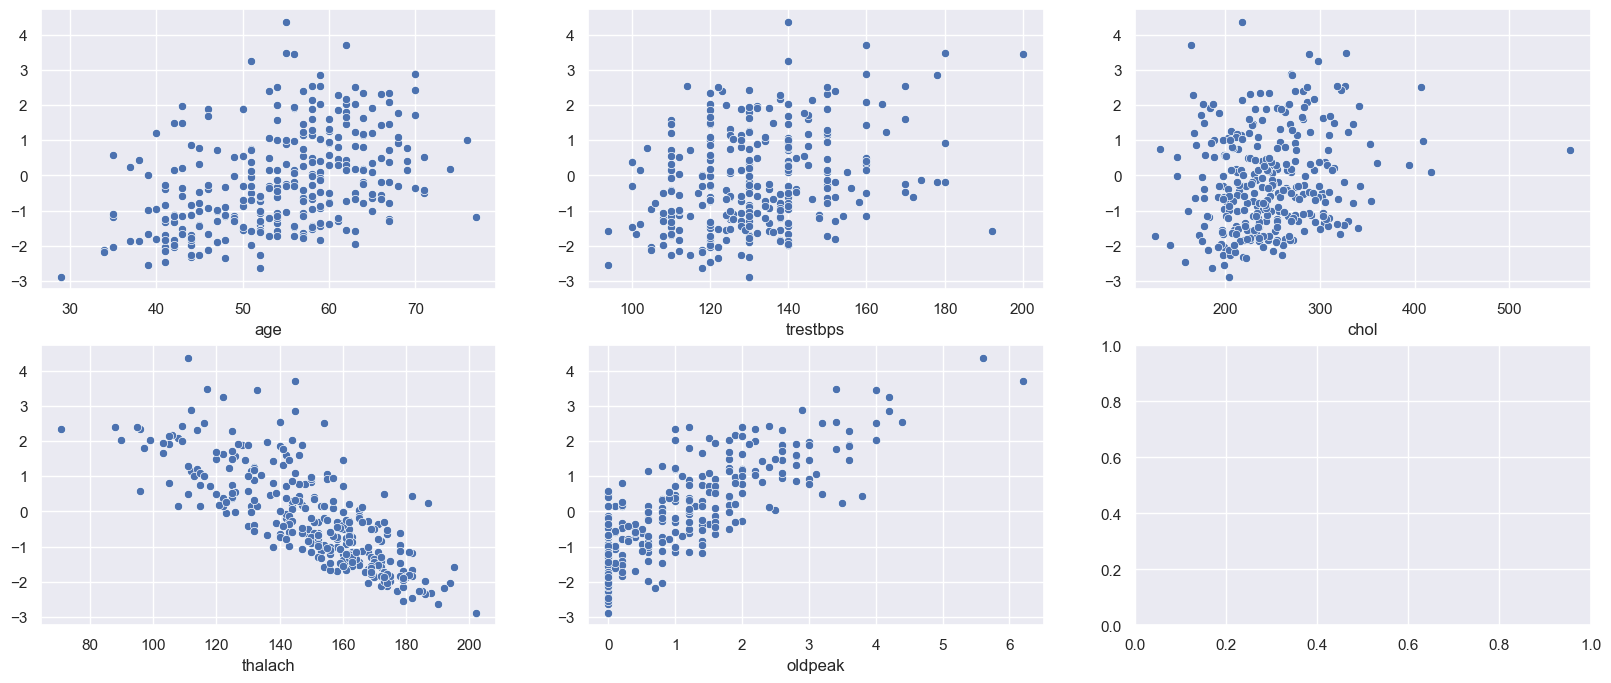

In [28]:
sns.set(rc={'figure.figsize':(20,8)})

p = result.predict(x_with_const)
log_odds = np.log(p/(1-p))


fig, ax = plt.subplots(nrows=2, ncols=3)
sns.scatterplot(x=x['age'], y=log_odds, ax=ax[0,0])
sns.scatterplot(x=x['trestbps'], y=log_odds, ax=ax[0,1])
sns.scatterplot(x=x['chol'], y=log_odds, ax=ax[0,2])
sns.scatterplot(x=x['thalach'], y=log_odds, ax=ax[1,0])
sns.scatterplot(x=x['oldpeak'], y=log_odds, ax=ax[1,1])

plt.show()

##### Influential outliers 

<a href="https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/influential-points-regression">Explanation about influential outlier</a>

Cook's distance or Cook's D is a commonly used estimate of the influence of a data point when performing a least-squares regression analysis

In [38]:
data4 = data.copy()

x = data4.copy().drop(['presence'], axis=1)
x_with_const = add_constant(x)
y = data4.presence

model = GLM(y, x_with_const, family=families.Binomial())
result = model.fit()

In [39]:
# find cook distance of every sample (use it as an influential measurement)
cook_distances = result.get_influence().summary_frame()['cooks_d']
cook_thres = 4/len(x)

# find standardized residual for every sample
std_resids = np.abs(stats.zscore(result.resid_pearson))

# influential outliers
data4[(cook_distances>cook_thres) & (std_resids>3)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
44,61,0,4,130.0,330.0,0.0,2,169,0,0.0,1,0,3,1
92,62,1,3,130.0,231.0,0.0,0,146,0,1.8,2,3,7,0
145,47,1,3,108.0,243.0,0.0,0,152,0,0.0,1,0,3,1
171,53,1,4,142.0,226.0,0.0,2,111,1,0.0,1,0,7,0
176,52,1,4,108.0,233.0,1.0,0,147,0,0.1,1,3,7,0
252,64,1,4,128.0,263.0,0.0,0,105,1,0.2,2,1,7,0
301,57,0,2,130.0,236.0,0.0,2,174,0,0.0,2,1,3,1


Remove influential outliers

In [41]:
data4 = data4[~((cook_distances>cook_thres) & (std_resids>3))]

##### Absence of Multicollinearity

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
ind_vars = data4.copy().drop(['presence'], axis=1)

vif = pd.DataFrame()
values = []
for i, var in enumerate(ind_vars.columns):
    values.append(variance_inflation_factor(ind_vars, i))
    

In [111]:
vif['variables'] = ind_vars.columns

In [112]:
vif['vif'] = values

In [113]:
vif

,variables,vif
0,age,41.610948
1,sex,3.841436
2,cp,13.479266
3,trestbps,60.420307
4,chol,25.981711
5,fbs,1.249642
6,restecg,2.172718
7,thalach,34.864912
8,exang,2.036501
9,oldpeak,3.200413


There are a few variables where multicollinearity is violated. However, we do not really focus on interpreting the coef! more about prediction, and since it does not hurt the performance of the prediction, thus can neglect this step of handling multicollinearity.\
When interpreting "age", "cp", "trestbps", "chol", "thalach", "slope" their coefficients are questionable though

In [114]:
from statsmodels.api import Logit

In [115]:
data5 = data4.copy()

In [116]:
x = data5.drop('presence', axis=1)
y = data5.presence

logit_model = Logit(y, add_constant(x))
logit_result = logit_model.fit()

logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.273802
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               presence   No. Observations:                  296
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                           13
Date:                Fri, 11 Nov 2022   Pseudo R-squ.:                  0.6031
Time:                        16:07:25   Log-Likelihood:                -81.045
converged:                       True   LL-Null:                       -204.20
Covariance Type:            nonrobust   LLR p-value:                 3.747e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6870      3.329     -2.309      0.021     -14.211      -1.163
age           -0.0316      0.028     -1.143      0.253      -0.086       0.023
sex            2.0225      0.603      3.353      0.001       0.840       3.205
cp             0.7283      0.213      3.412      0.001       0.310       1.147
trestbps       0.0345      0.012      2.837      0.005       0.011       0.058
chol           0.0070      0.004      1.594      0.111      -0.002       0.016
fbs           -0.8544      0.611     -1.399      0.162      -2.051       0.343
restecg        0.1397      0.210      0.666      0.505      -0.271       0.551
thalach       -0.0369      0.013     -2.940      0.003      -0.061      -0.012
exang          1.3301      0.477      2.788      0.005       0.395       2.265
oldpeak        0.1602      0.238      0.674      0.500      -0.306       0.626
slope          0.7345      0.409      1.795      0.073      -0.067       1.536
ca             1.8092      0.338      5.350      0.000       1.146       2.472
thal           0.4315      0.112      3.869      0.000       0.213       0.650
==============================================================================
"""

Try to interpret the coefficients:
* "age", "cp", "trestbps", "chol", "thalach", "slope"'s coefficients are questionable due to multicollinearity
* "sex"'s coef's p-value = 0.001: changing from "female" to "male" change the estimate of odd(=p/(1-p)) a factor of exp(2.0225)=7.5 
* exang
* ca
* thal